# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the file `craftcans.csv`, and look at the first first rows

In [105]:
df = pd.read_csv("craftcans.csv", na_values=["Does not apply"])
df.head(5)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [106]:
df.shape

(2416, 7)

In [107]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [108]:
df.value_counts("Brewery", ascending=False).head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [109]:
df.value_counts("ABV", ascending=False, normalize=True ).head(1)

ABV
5.00%    0.091567
Name: proportion, dtype: float64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [110]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [111]:
df.ABV = df.ABV.str.replace("%","").astype(float)

In [112]:
df.ABV

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [113]:
df.ABV.dtypes

dtype('float64')

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [114]:
df.ABV.mean()

5.977342419080068

In [115]:
df.ABV.median()

5.6

<Axes: >

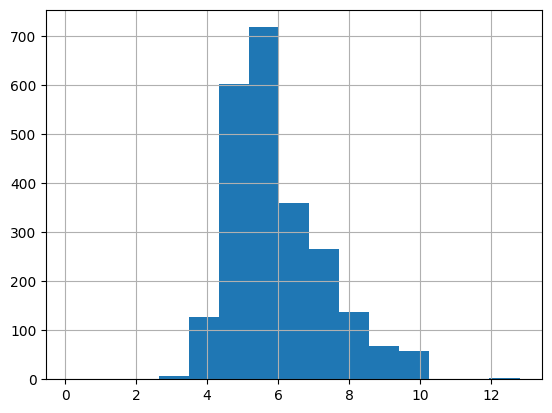

In [116]:
df.ABV.hist(bins=15)

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [117]:
df.ABV.isna().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [118]:
df['Location'].value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [119]:
df[df.Location == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [120]:
df[df.Location == 'Brooklyn, NY'].Brewery.value_counts().head(1)

Brewery
Sixpoint Craft Ales    24
Name: count, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [121]:
df[df.Brewery == 'Sixpoint Craft Ales'].Style.value_counts().head(5)

Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [122]:
df[df.Location.str.contains("NY$", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN


### Now *count* all of the breweries in New York state

In [123]:
df[df.Location.str.contains("NY$", na=False)].Brewery.value_counts()

Brewery
Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
The Bronx Brewery                 3
KelSo Beer Company                3
Chatham Brewing                   2
Montauk Brewing Company           2
Bomb Beer Company                 2
Upstate Brewing Company           2
Newburgh Brewing Company          1
Southampton Publick House         1
The Manhattan Brewing Company     1
Dundee Brewing Company            1
Name: count, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [124]:
df[df.Style.str.contains(".*IPA.*", na=False)].Style.value_counts()

Style
American IPA                      424
American Double / Imperial IPA    105
Belgian IPA                        18
English India Pale Ale (IPA)       13
American White IPA                 11
Name: count, dtype: int64

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [125]:
df.IBUs.mean()

42.71316725978647

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [126]:
df.IBUs.isna().value_counts()

IBUs
False    1405
True     1011
Name: count, dtype: int64

In [127]:
df[df.IBUs.isna()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
16,Kamen Knuddeln,Against the Grain Brewery,"Louisville, KY",American Wild Ale,16 oz.,6.5,NaN
34,Blackbeard,COAST Brewing Company,"Charleston, SC",American Double / Imperial Stout,12 oz.,9.3,NaN
35,Rye Knot,COAST Brewing Company,"Charleston, SC",American Brown Ale,12 oz.,6.2,NaN
36,Dead Arm,COAST Brewing Company,"Charleston, SC",American Pale Ale (APA),12 oz.,6.0,NaN
37,32°/50° Kölsch,COAST Brewing Company,"Charleston, SC",Kölsch,16 oz.,4.8,NaN
...,...,...,...,...,...,...,...
2378,Atlantic Amber Ale (2007),New England Brewing Company,"Woodbridge, CT",American Amber / Red Ale,12 oz.,5.0,NaN
2379,Sea Hag IPA (Current),New England Brewing Company,"Woodbridge, CT",American IPA,12 oz.,6.2,NaN
2388,Urban Wilderness Pale Ale,Sleeping Lady Brewing Company,"Anchorage, AK",English Pale Ale,12 oz.,4.9,NaN
2389,Very Noddy Lager (Current),Buckbean Brewing Company,"Reno, NV",Schwarzbier,16 oz.,9.9,NaN


In [128]:
df.IBUs.mean(skipna=True)

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<Axes: >

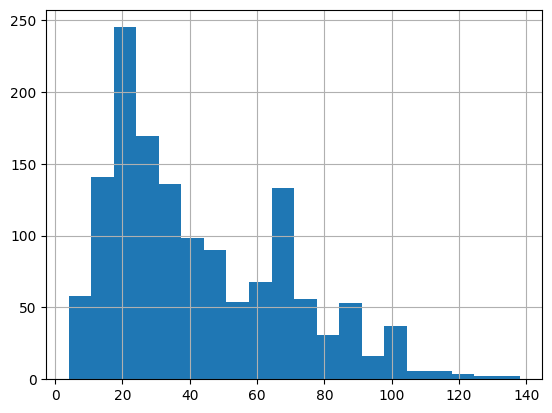

In [130]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [131]:
df.IBUs.describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [134]:
df[df.IBUs > 64].sort_values(by='IBUs', ascending=False)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1662,Bitter Bitch Imperial IPA,Astoria Brewing Company,"Astoria, OR",American Double / Imperial IPA,12 oz.,8.2,138.0
989,Troopers Alley IPA,Wolf Hills Brewing Company,"Abingdon, VA",American IPA,12 oz.,5.9,135.0
611,Dead-Eye DIPA,Cape Ann Brewing Company,"Gloucester, MA",American Double / Imperial IPA,16 oz.,9.0,130.0
249,Bay of Bengal Double IPA (2014),Christian Moerlein Brewing Company,"Cincinnati, OH",American Double / Imperial IPA,12 oz.,8.9,126.0
1537,Heady Topper,The Alchemist,"Waterbury, VT",American Double / Imperial IPA,16 oz.,8.0,120.0
...,...,...,...,...,...,...,...
1256,Heal the Bay IPA,Golden Road Brewing,"Los Angeles, CA",American IPA,16 oz.,6.8,65.0
1214,Dale's Pale Ale,Oskar Blues Brewery,"Longmont, CO",American Pale Ale (APA),12 oz.,6.5,65.0
1173,Falling Down Brown Ale,Old Forge Brewing Company,"Danville, PA",American Brown Ale,16 oz.,6.5,65.0
1871,Dale's Pale Ale (2002),Oskar Blues Brewery,"Lyons, CO",American Pale Ale (APA),12 oz.,6.5,65.0


## List all of the beers with IBUs below the 25th percentile

In [135]:
df[df.IBUs < 21].sort_values(by='IBUs')

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1303,Summer Solstice,Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0
1860,Summer Solstice Cerveza Crema (2009),Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0
2339,Summer Solstice (2011),Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0
1903,Devils Tramping Ground Tripel,Aviator Brewing Company,"Fuquay-Varina, NC",Tripel,12 oz.,9.2,5.0
318,18th Anniversary Gose,Real Ale Brewing Company,"Blanco, TX",Gose,12 oz.,4.4,5.0
...,...,...,...,...,...,...,...
1263,Sanitas Saison Ale,Sanitas Brewing Company,"Boulder, CO",Saison / Farmhouse Ale,12 oz.,5.8,20.0
1265,Double D Blonde (2013),Hop Valley Brewing Company,"Springfield, OR",American Blonde Ale,12 oz.,4.9,20.0
1313,UFO Pumpkin,Harpoon Brewery,"Boston, MA",Pumpkin Ale,12 oz.,5.9,20.0
1204,Parcae Belgian Style Pale Ale,Fate Brewing Company,"Boulder, CO",Belgian Pale Ale,16 oz.,5.0,20.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [139]:
df.groupby("Style").IBUs.median().sort_values(ascending=False, na_position='last')

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

<Axes: ylabel='Style'>

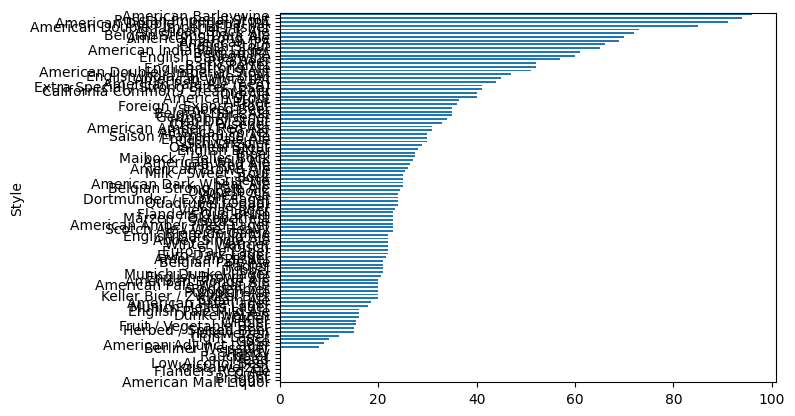

In [143]:
df.groupby("Style").IBUs.median().sort_values(na_position='first').plot.barh()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [145]:
#high-IBU beer, most common 5 styles
df[df.IBUs > 64].Style.value_counts(ascending=False).head(5)

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

In [146]:
#low-IBU beer, most common 5 styles
df[df.IBUs <21].Style.value_counts(ascending=False).head(5)

Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [150]:
df[df.Style.isin(['Witbier','Hefeweizen','American Pale Wheat Ale'])].IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

<Axes: >

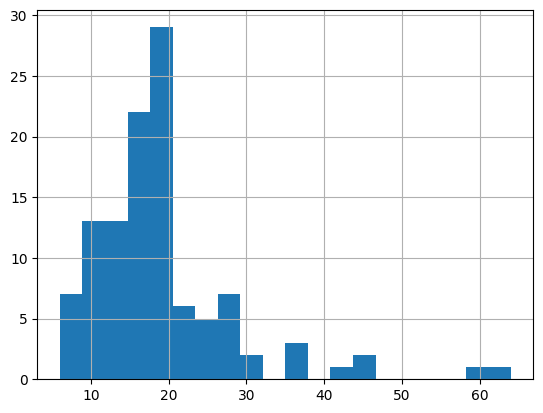

In [154]:
df[df.Style.isin(['Witbier','Hefeweizen','American Pale Wheat Ale'])].IBUs.hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [155]:
df[df.Style.str.contains('.*IPA.*', na=False)].IBUs.mean()

71.94897959183673

<Axes: >

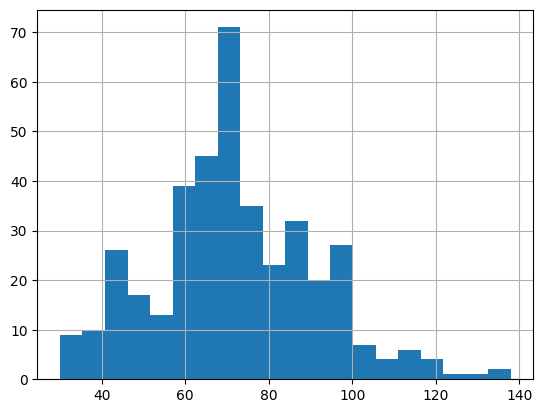

In [156]:
df[df.Style.str.contains('.*IPA.*', na=False)].IBUs.hist(bins=20)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: >

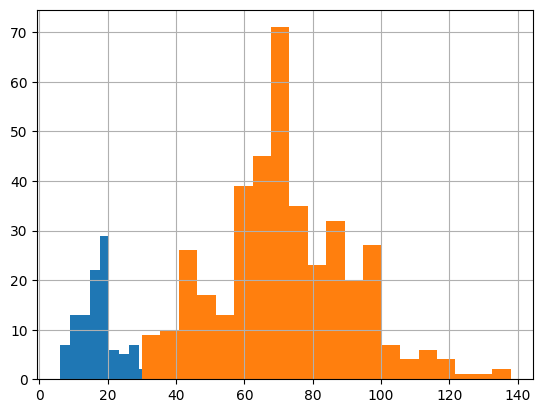

In [157]:
df[df.Style.isin(['Witbier','Hefeweizen','American Pale Wheat Ale'])].IBUs.hist(bins=20)
df[df.Style.str.contains('.*IPA.*', na=False)].IBUs.hist(bins=20)

In [ ]:
# It overlaps...

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

<Axes: >

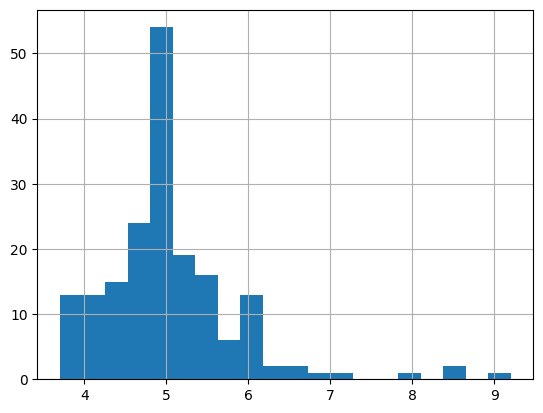

In [158]:
#ABV of wheat beers
df[df.Style.isin(['Witbier','Hefeweizen','American Pale Wheat Ale'])].ABV.hist(bins=20)

<Axes: >

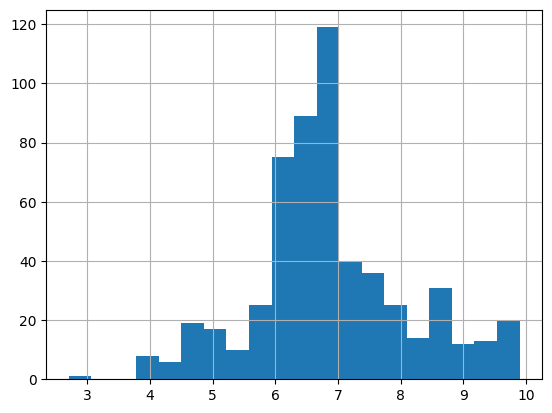

In [159]:
#ABV of IPA beers
df[df.Style.str.contains('.*IPA.*', na=False)].ABV.hist(bins=20)

In [ ]:
# Their pattern seem to not change much

## Good work!